<a href="https://colab.research.google.com/github/mikaylafreitas/CECS-456-Animal-Identification/blob/main/Final_Animals_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [ ]:
# download the dataset into colab files
! mkdir .kaggle
! mv .kaggle /root/.kaggle
file = open('/root/.kaggle/kaggle.json', 'w')
file.write('{"username":"michaelhannigan","key":"632d50dd624ee247052cad925a6ee2fa"}')
file.close()
! kaggle datasets download --force alessiocorrado99/animals10


100% 586M/586M [00:07<00:00, 105MB/s] 



In [ ]:
!unzip animals10.zip

Archive:  animals10.zip
replace raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
IMAGE_SIZE = 28
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel"}  
X = []
y = []

In [ ]:
for category,translation in translate.items():
            pathname="/content/raw-img/"+category
            label=translation

            for img in os.listdir(pathname):
              pic = cv2.imread(os.path.join(pathname, img), cv2.IMREAD_GRAYSCALE)
              feature = cv2.resize(pic, (IMAGE_SIZE, IMAGE_SIZE))
              feature = feature.astype(np.float32)
              feature /= 255.0
              X.append(feature)
              y.append(label)
              

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(len(X_train), len(y_train), len(X_test), len(y_test))

20943 20943 5236 5236


In [ ]:
# reshape the array of feature images & normalize
X_train=np.array(X_train).reshape(-1,IMAGE_SIZE, IMAGE_SIZE,1)
X_train = tf.keras.utils.normalize(X_train,axis=1)
y_train =np.array(y_train) 
                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
# Encode the features so that they are float32 and not strings
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
label_mapping = dict(zip(encoder.fit_transform(encoder.classes_), encoder.classes_))

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


H = model.fit(X_train, y_train, batch_size = 100, epochs=30)

Epoch 1/30
210/210 [==============================] - 18s 83ms/step - loss: 2.2920 - accuracy: 0.2038
Epoch 2/30
210/210 [==============================] - 17s 82ms/step - loss: 2.0230 - accuracy: 0.2912
Epoch 3/30
210/210 [==============================] - 17s 82ms/step - loss: 1.8809 - accuracy: 0.3523
Epoch 4/30
210/210 [==============================] - 17s 82ms/step - loss: 1.7621 - accuracy: 0.3953
Epoch 5/30
210/210 [==============================] - 17s 83ms/step - loss: 1.6607 - accuracy: 0.4307
Epoch 6/30
210/210 [==============================] - 17s 82ms/step - loss: 1.5774 - accuracy: 0.4585
Epoch 7/30
210/210 [==============================] - 17s 82ms/step - loss: 1.5271 - accuracy: 0.4738
Epoch 8/30
210/210 [==============================] - 17s 81ms/step - loss: 1.4663 - accuracy: 0.4957
Epoch 9/30
210/210 [==============================] - 17s 82ms/step - loss: 1.4268 - accuracy: 0.5107
Epoch 10/30
210/210 [==============================] - 17s 82ms/step - loss: 1.368

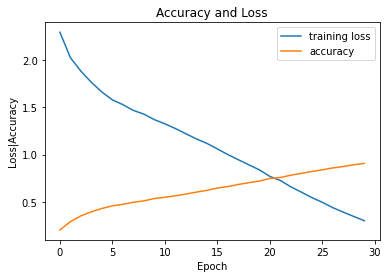

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
numOfEpoch = 30
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
#plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
#plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
x_new = X_test[:10]

y_pred =model.predict(np.array(x_new).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1))

print("Actual animal: ", y_test[0])
print("Predicted animal: ", label_mapping[np.argmax(y_pred[0])])

Actual animal:  spider
Predicted animal:  spider
